# Obtener información y datos historicos de IHData pertenecientes a Copernicous 
### Para ello, se utilizará el OpenDAP de IHData

In [1]:
import xarray as xr
import pandas as pd
import folium
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = xr.open_dataset('https://ihthredds.ihcantabria.com/thredds/dodsC/COPERNICUS/CMEMS/IBI_REANALYSIS_WAV_005_006/IBI_REANALYSIS_WAV_005_006.nc')
data

<xarray.Dataset> Size: 1TB
Dimensions:    (longitude: 241, latitude: 301, time: 245424)
Coordinates:
  * longitude  (longitude) float32 964B -19.0 -18.9 -18.8 -18.7 ... 4.8 4.9 5.0
  * latitude   (latitude) float32 1kB 26.0 26.1 26.2 26.3 ... 55.8 55.9 56.0
  * time       (time) datetime64[ns] 2MB 1992-01-01 ... 2019-12-30T23:00:00
Data variables: (12/17)
    VHM0_WW    (time, latitude, longitude) float32 71GB ...
    VMDR_SW2   (time, latitude, longitude) float32 71GB ...
    VMDR       (time, latitude, longitude) float32 71GB ...
    VMDR_SW1   (time, latitude, longitude) float32 71GB ...
    VTM10      (time, latitude, longitude) float32 71GB ...
    VPED       (time, latitude, longitude) float32 71GB ...
    ...         ...
    VSDX       (time, latitude, longitude) float32 71GB ...
    VTM01_SW1  (time, latitude, longitude) float32 71GB ...
    VSDY       (time, latitude, longitude) float32 71GB ...
    VHM0       (time, latitude, longitude) float32 71GB ...
    VTM01_WW   (time, latitude, longitude) float32 71GB ...
    VHM0_SW2   (time, latitude, longitude) float32 71GB ...
Attributes: (12/27)
    CDI:                                    Climate Data Interface version ??...
    Conventions:                            CF-1.0
    history:                                Mon Oct 05 09:40:29 2020: cdo mer...
    source:                                 IBI-MFC (PdE Production Center)
    institution:                            Aemet-Puertos del Estado (Aemet-PdE)
    NCO:                                    4.4.4
    ...                                     ...
    z_max:                                  0.0f
    contact:                                mailto: servicedesk.cmems@mercato...
    FROM_ORIGINAL_FILE__netcdf_version_id:  4.4.3
    nco_openmp_thread_number:               1
    _CoordSysBuilder:                       ucar.nc2.dataset.conv.CF1Convention
    CDO:                                    Climate Data Operators version 1....

#### Buscar nodos mas cercanos a las boyas

In [3]:
df_boyas = pd.read_csv('boyas.csv')
df_boyas

,Nombre,Longitud,Latitud,Cadencia,Codigo,Profundidad,InicioMedida,UltimaMedida,TipoSensor,Modelo,ConjuntoDatos
0,Bilbao-Vizcaya,-3.04,43.64,60,2136,580,07-11-1990,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT
1,Cabo_de_Pennas,-6.18,43.75,60,2242,615,09-06-1998,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT
2,Estaca_de_Bares,-7.68,44.12,60,2244,1800,19-07-1996,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT
3,Villano-Sisargas,-9.21,43.80,60,2246,386,12-05-1998,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT
4,Cabo_Silleiro,-9.43,42.12,60,2248,600,06-07-1998,23-04-2020,Direccional Met-Oce,SeaWatch,REDEXT
5,Golfo_de_Cadiz,-6.96,36.49,60,2342,450,27-08-1996,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT
6,Cabo_de_Gata,-2.34,36.57,60,2548,536,27-03-1998,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT
7,Cabo_de_Palos,-0.31,37.65,60,2610,230,18-07-2006,03-04-2020,Direccional Met-Oce,SeaWatch,REDEXT
8,Valencia,-0.20,39.51,60,2630,260,15-09-2005,15-06-2020,Direccional Met-Oce,SeaWatch,REDEXT
9,Tarragona,1.47,40.69,60,2720,688,20-08-2004,10-07-2024,Direccional Met-Oce,SeaWatch,REDEXT


In [4]:
df_hindcast = pd.DataFrame(columns=['Nombre', 'Longitud', 'Latitud', 'InicioMedida', 'FinMedida'])
for nombre, lat, lon in zip(df_boyas.Nombre, df_boyas.Latitud, df_boyas.Longitud):   
    data_c = data.sel(latitude=lat, longitude=lon, method="nearest")
    # data_c.to_netcdf(f'./data/raw/historico/IBI_REANALYSIS_WAV_005_006_{nombre}.nc')
    
    df_hindcast.loc[len(df_hindcast.index)] = [nombre, data_c.longitude.values, data_c.latitude.values, data_c.time.values[0], data_c.time.values[-1]]
df_hindcast

,Nombre,Longitud,Latitud,InicioMedida,FinMedida
0,Bilbao-Vizcaya,-3.0,43.6,1992-01-01,2019-12-30 23:00:00
1,Cabo_de_Pennas,-6.2,43.8,1992-01-01,2019-12-30 23:00:00
2,Estaca_de_Bares,-7.7,44.1,1992-01-01,2019-12-30 23:00:00
3,Villano-Sisargas,-9.2,43.8,1992-01-01,2019-12-30 23:00:00
4,Cabo_Silleiro,-9.4,42.1,1992-01-01,2019-12-30 23:00:00
5,Golfo_de_Cadiz,-7.0,36.5,1992-01-01,2019-12-30 23:00:00
6,Cabo_de_Gata,-2.3,36.6,1992-01-01,2019-12-30 23:00:00
7,Cabo_de_Palos,-0.3,37.7,1992-01-01,2019-12-30 23:00:00
8,Valencia,-0.2,39.5,1992-01-01,2019-12-30 23:00:00
9,Tarragona,1.5,40.7,1992-01-01,2019-12-30 23:00:00


In [5]:
m = folium.Map(location=(39, -5), zoom_start=5)
for i in range(len(df_hindcast)):
    folium.Marker(location=[df_boyas.Latitud[i], df_boyas.Longitud[i]], icon=folium.Icon(color='black')).add_to(m)
    
    data_c = data.sel(latitude=df_hindcast.Latitud[i], longitude=df_hindcast.Longitud[i], method="nearest")   
    folium.Marker(location=[data_c.latitude.values, data_c.longitude.values], tooltip=folium.Tooltip(df_hindcast.Nombre[i], permanent=True)).add_to(m)
m

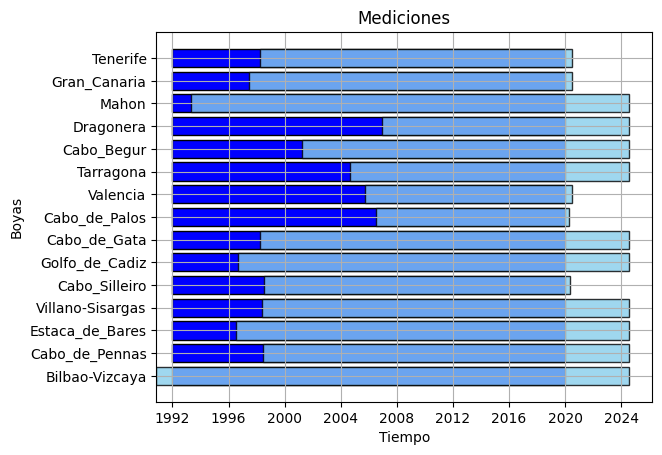

In [6]:
fig, ax = plt.subplots()
for i, task in df_boyas.iterrows():   
    start = dt.datetime.strptime('01-01-1992', '%d-%m-%Y')
    finish = dt.datetime.strptime('30-12-2019', '%d-%m-%Y')
    ax.barh(df_hindcast.loc[i]['Nombre'], (finish - start).days, left=start, color='blue', edgecolor='black')
    
    start = dt.datetime.strptime(task['InicioMedida'], '%d-%m-%Y')
    finish = dt.datetime.strptime(task['UltimaMedida'], '%d-%m-%Y')
    ax.barh(task['Nombre'], (finish - start).days, left=start, color='skyblue', edgecolor='black', alpha=0.8)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Boyas')
ax.set_title('Mediciones')
plt.gca().set_facecolor("white")
ax.grid(True)

#### Explorar datos

In [7]:
data = xr.open_dataset(f'data/raw/historico/IBI_REANALYSIS_WAV_005_006_Bilbao-Vizcaya.nc')
df_var = pd.DataFrame(columns=['Variable', 'Unidades', 'Descripción'])
for var in data.variables:
    standard_name = data[var].standard_name if hasattr(data[var], 'standard_name') else '****'
    units = data[var].units if hasattr(data[var], 'units') else '****'
    df_var.loc[len(df_var.index)] = [var, units, standard_name]
df_var

,Variable,Unidades,Descripción
0,longitude,degrees_east,longitude
1,latitude,degrees_north,latitude
2,time,****,time
3,VHM0_WW,m,sea_surface_wind_wave_significant_height
4,VMDR_SW2,degree,sea_surface_secondary_swell_wave_from_direction
5,VMDR,degree,sea_surface_wave_from_direction
6,VMDR_SW1,degree,sea_surface_primary_swell_wave_from_direction
7,VTM10,s,sea_surface_wave_mean_period_from_variance_spe...
8,VPED,degree,sea_surface_wave_from_direction_at_spectral_peak
9,VTPK,s,sea_surface_wave_period_at_variance_spectral_d...
